In [1]:
import pathlib

import scipy.stats as st
from scipy.special import logsumexp
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from couplings import maximal_coupling_reference, maximal_coupling, ReflectionMaximalCoupling, reflection_maximal_coupling, metropolis_hastings, unbiased_estimator
from couplings.utils import plot_coupled_chains

image_dir = pathlib.Path("..", "static", "img").resolve()
assert image_dir.exists()

In [2]:
plt.style.use('tufte')

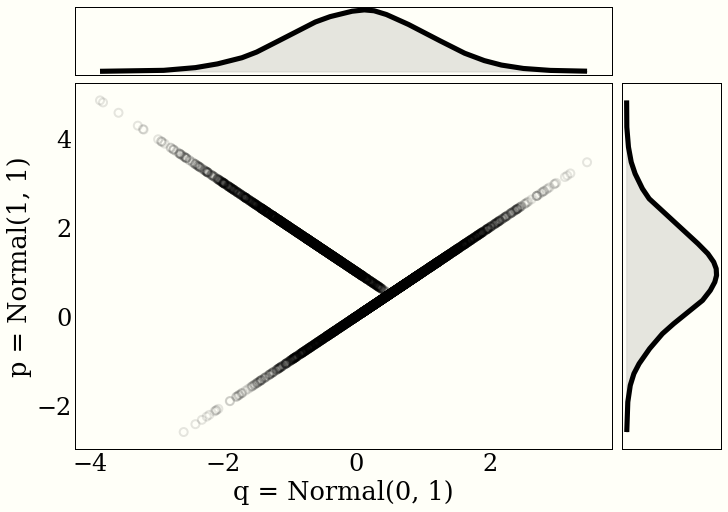

In [3]:
μ1 = 0
μ2 = 1
rmc = ReflectionMaximalCoupling(st.norm(), 1)
points = np.array(rmc(μ1, μ2, 5000)).squeeze()
axes = az.plot_joint(points.T[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_xlabel(f'q = Normal({μ1}, 1)')
axes[0].set_ylabel(f'p = Normal({μ2}, 1)');
fig = axes[0].get_figure()
fig.savefig(image_dir / "rmc_0_1.png")

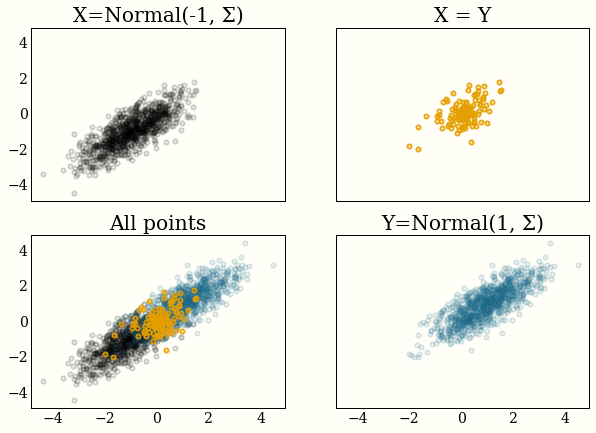

In [4]:
dim = 2
s = st.multivariate_normal(np.zeros(dim), np.eye(dim))
μ1 = -np.ones(dim)
μ2 = np.ones(dim)
Σ = 0.2 * np.eye(dim) + 0.8 * np.ones((dim, dim))
rmc = ReflectionMaximalCoupling(s, Σ)
points = np.array(rmc(μ1, μ2, 1000)).squeeze()

equal = np.all(points[0, :, :] == points[1, :, :], axis=1)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7), sharex=True, sharey=True)

axes[0, 0].plot(points[0, :, 0], points[0, :, 1], '.', alpha=0.2, color='C0')
axes[0, 0].set_title('X=Normal(-1, Σ)')
axes[1, 1].plot(points[1, :, 0], points[1, :, 1], '.', alpha=0.2, color='C1')
axes[1, 1].set_title('Y=Normal(1, Σ)')
axes[0, 1].plot(points[0, equal, 0], points[0, equal, 1], '.', label='X=Y', alpha=0.9, color='C2')
axes[0, 1].set_title('X = Y')
axes[1, 0].plot(points[0, ~equal, 0], points[0, ~equal, 1], '.', label='X=Normal(0, Σ)', alpha=0.2)
axes[1, 0].plot(points[1, ~equal, 0], points[1, ~equal, 1], '.', label='Y=Normal(1, Σ)', alpha=0.2)
axes[1, 0].plot(points[0, equal, 0], points[0, equal, 1], '.', label='X=Y', alpha=0.9)
axes[1, 0].set_title('All points')
fig.savefig(image_dir / "reflection_maximal_coupling_2d.png")

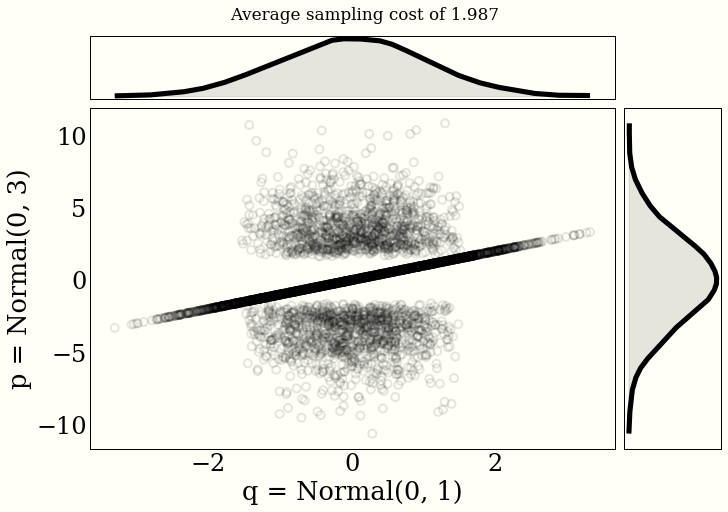

In [5]:
q = st.norm(0, 3)
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Normal(0, 3)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_diff_var.png")

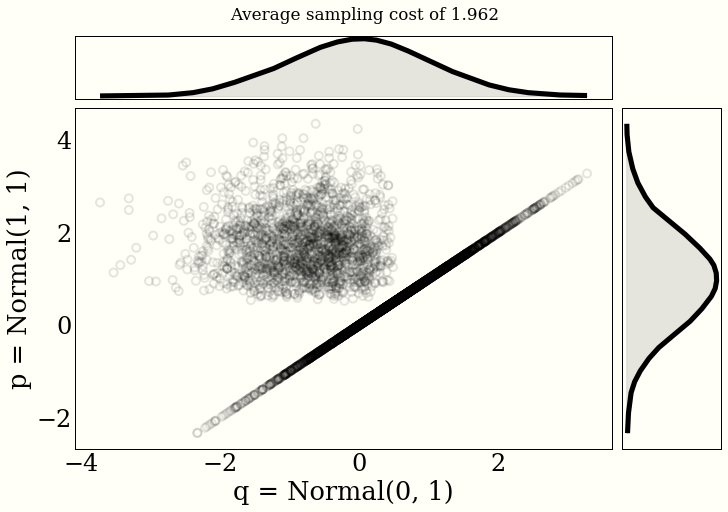

In [6]:
q = st.norm(1, 1)
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Normal(1, 1)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_diff_mean.png")

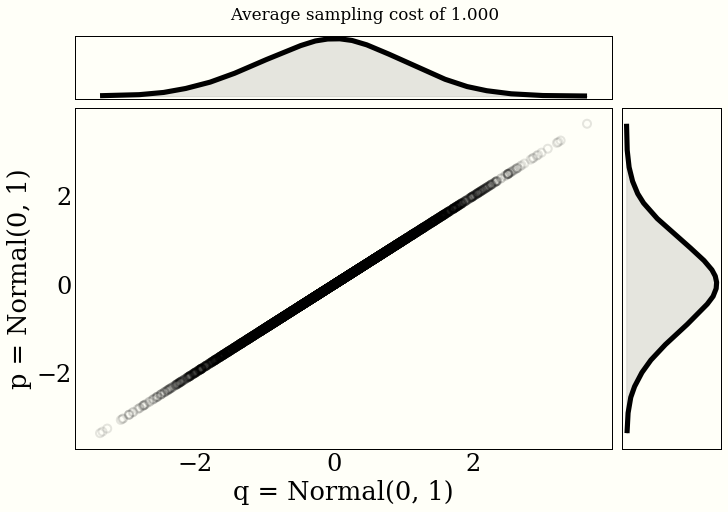

In [7]:
q = st.norm()
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)
axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Normal(0, 1)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_same.png")

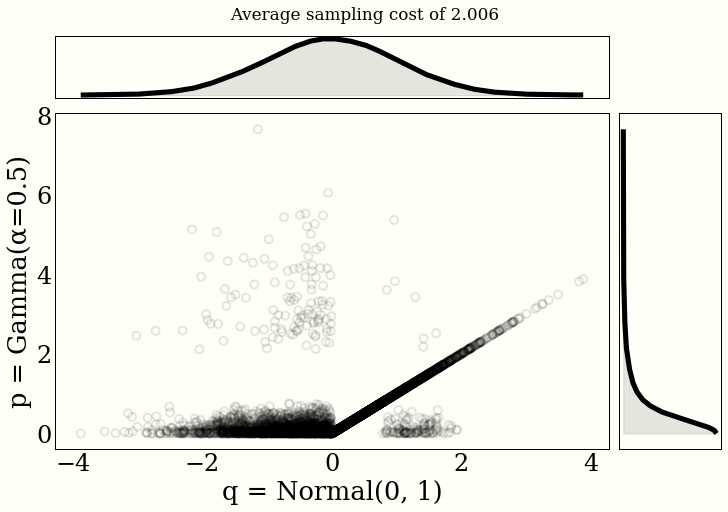

In [8]:
q = st.gamma(a=0.5)
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Gamma(α=0.5)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_diff_dists.png")

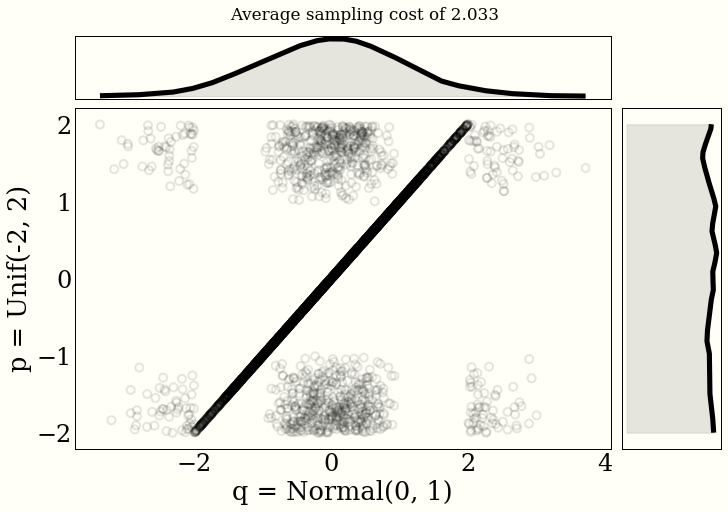

In [9]:
q = st.uniform(-2, 4)
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Unif(-2, 2)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_diff_dists_unif.png")

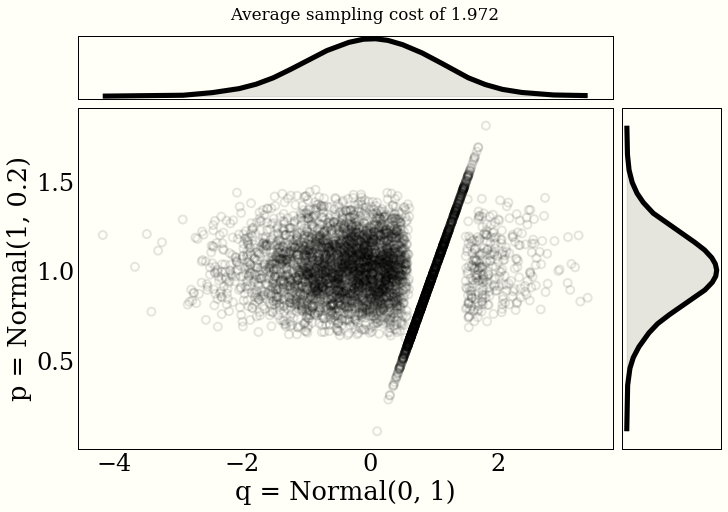

In [10]:
q = st.norm(1, 0.2)
p = st.norm()

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = Normal(1, 0.2)')
axes[0].set_xlabel('q = Normal(0, 1)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')
fig.savefig(image_dir / "maximal_coupling_diff_var_mean.png")

Text(0.5, 0.98, 'Average sampling cost of 2.009')

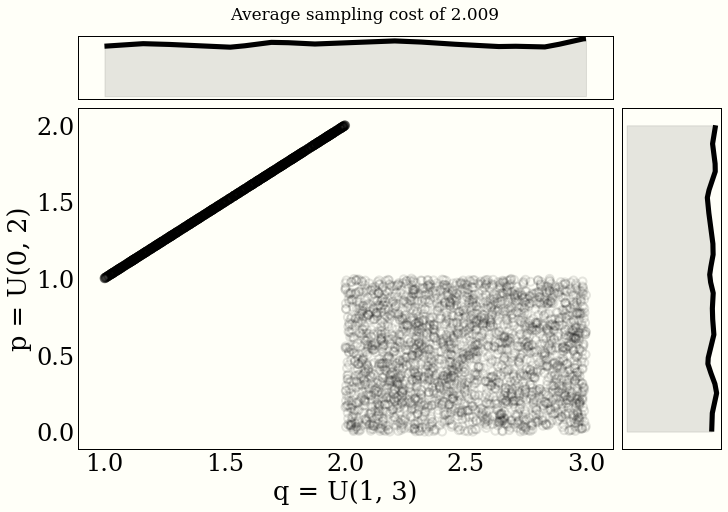

In [16]:
q = st.uniform(0, 2)
p = st.uniform(1, 2)

points, cost = maximal_coupling(p, q, size=5_000)

axes = az.plot_joint(points[np.newaxis, :, :2], 
                     joint_kwargs={'alpha': 0.1, 'facecolor': 'none', 'linewidth': 2, 'color': 'k'}, 
                     marginal_kwargs={'fill_kwargs': {'alpha': 0.1}}, 
                     figsize=(10, 7))
axes[0].set_ylabel('p = U(0, 2)')
axes[0].set_xlabel('q = U(1, 3)')
fig = axes[0].get_figure()
fig.suptitle(f'Average sampling cost of {cost.mean():.3f}')